In [211]:
import pandas as pd
import importlib
import mpt_functions as mpt
importlib.reload(mpt)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

In [107]:
path = "/Users/abdullahfurkanarslan/Desktop/metropt+3+dataset 2/MetroPT3(AirCompressor).csv"
df = mpt.get_the_data_and_convert_datetime(path)

In [108]:
df = mpt.drop_a_column(df, "Unnamed: 0")

In [110]:
f1_start = "2020-04-18 00:00:00"
f1_finish = "2020-04-18 23:59:00"
f2_start = "2020-05-29 23:30:00"
f2_finish = "2020-05-30 06:00:00"
f3_start = "2020-06-05 10:00:00"
f3_finish = "2020-06-07 14:30:00"
f4_start = "2020-07-15 14:30:00"
f4_finish = "2020-07-15 19:00:00"

In [111]:
df = df.assign(condition=0)
df = mpt.change_the_values_by_applying_a_time_filter(df, f1_start, f1_finish, "condition", 1)
df = mpt.change_the_values_by_applying_a_time_filter(df, f2_start, f2_finish, "condition", 1)
df = mpt.change_the_values_by_applying_a_time_filter(df, f3_start, f3_finish, "condition", 1)
df = mpt.change_the_values_by_applying_a_time_filter(df, f4_start, f4_finish, "condition", 1)

In [112]:
df["day_number"] = df.index + 1

In [113]:
df  = mpt.counter_for_maintenance(df , "2020-02-01 00:00:00", f1_finish)
df  = mpt.counter_for_maintenance(df , f1_finish, f2_finish)
df  = mpt.counter_for_maintenance(df , f2_finish, f3_finish)
df  = mpt.counter_for_maintenance(df , f3_finish, f4_finish)
df = mpt.counter_for_maintenance(df, f4_finish, "2020-09-01 03:59:51")

In [154]:
all_column_names = df.columns.to_list()

name_of_the_categorical_columns = ['COMP', 'DV_eletric', 'Towers',
       'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']

name_of_the_numerical_columns =["counter",'day_number','TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Motor_current']

target_column = df["condition"]

In [155]:
df_scaled = mpt.scale_columns(df, name_of_the_numerical_columns)
df_scaled.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,condition,day_number,counter
0,2020-02-01 00:00:00,-0.424441,0.584247,0.531575,-0.20909,0.583993,-1.387941,-0.873208,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,-1.732050,-1.372743
1,2020-02-01 00:00:10,-0.425056,0.568600,0.529175,-0.20386,0.568326,-1.376431,-0.873208,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,-1.732047,-1.372736
2,2020-02-01 00:00:19,-0.424441,0.552953,0.526175,-0.20386,0.552660,-1.387941,-0.872122,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,-1.732045,-1.372729
3,2020-02-01 00:00:29,-0.424441,0.537306,0.523175,-0.20386,0.536993,-1.414797,-0.873208,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,-1.732043,-1.372722
4,2020-02-01 00:00:39,-0.424441,0.521659,0.520175,-0.20386,0.521327,-1.407124,-0.873208,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,-1.732041,-1.372715


In [186]:
df_clustered = mpt.apply_kmeans_clustering(df_scaled, 5, "condition")
df_clustered["Cluster"].value_counts()

Cluster
2    474173
1    323268
0    323155
3    213717
4    182635
Name: count, dtype: int64

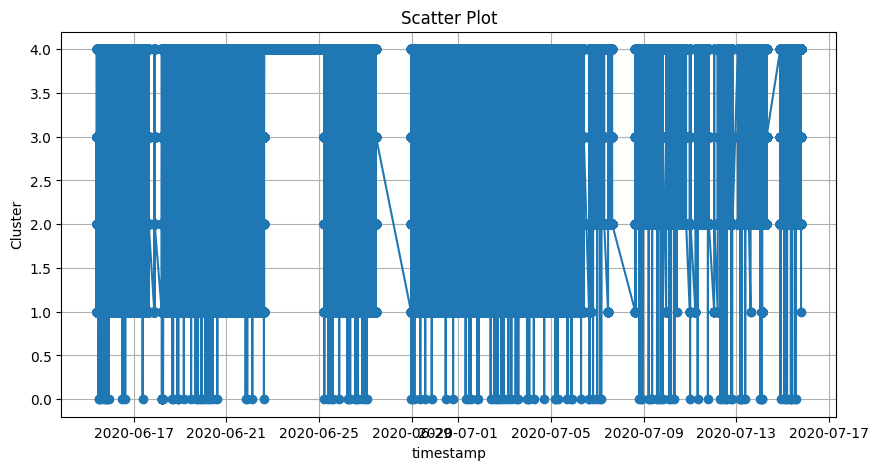

In [187]:
mpt.plot_columns(mpt.filter_rows_between_the_given_timestamps(df_clustered, "2020-06-15 09:30:00", f4_finish), "timestamp", "Cluster")

In [188]:
mpt.check_cluster_distribution(df_clustered, "condition", "Cluster")


Cluster Distribution by Condition:
 condition       0      1
Cluster                 
0          323064     91
1          323064    204
2          473700    473
3          213678     39
4          153488  29147


condition,0,1
Cluster,,
0,323064,91
1,323064,204
2,473700,473
3,213678,39
4,153488,29147


In [191]:
df_last = mpt.drop_a_column(df_clustered, "timestamp")

Until Here, everystep was clear to do

*SMOTE*

In [192]:
dfa = df_last.copy()

In [205]:
dfa = mpt.apply_smote(dfa, "condition", 11)

Before :  condition
0    1486994
1    1486994
Name: count, dtype: int64
After :  condition
0    1486994
1    1486994
Name: count, dtype: int64


In [208]:
mpt.apply_random_forest_and_get_results(dfa, "condition")

Accuracy: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[490228      1]
 [     2 491186]]


(RandomForestClassifier(random_state=42), 0.9999969431954001)

*imbalanced dataset*

In [209]:
dfb = df_last.copy()

In [212]:
mpt.apply_random_forest_and_get_results(dfb, "condition")

Accuracy: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[490590      0]
 [     5   9998]]


(RandomForestClassifier(random_state=10), 0.9999900118459507)